In [1]:
# imports
import jupyterthemes as jt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.fft import fft, ifft
# jt.jtplot.style()

%matplotlib inline

In [2]:
image_path = "images/"

In [3]:
color2, color1 = '#d44300', '#0091d4'  #red, #blue

In [4]:
def fft_plot(osc_path, osc_name, spec_path, spec_name, window="uniform", do_dBV=False, wave=' ', savename='', do_spec=True, xlim=False):
    data = pd.read_csv(osc_path + osc_name, header=None)
    df = pd.read_csv(spec_path + spec_name, header=None)
    
    times = data[3]
    voltages = data[4]

    if window == "uniform":
        pass
    elif window == "hanning":
        voltages *= np.hanning(data[3].size)
    elif window == "kaiser":
        voltages *= np.kaiser(data[3].size, beta)
    elif window == "hamming":
        voltages *= np.hamming(data[3].size)
    elif window == "bartlett":
        voltages *= np.bartlett(data[3].size)
    elif window == "blackman":
        voltages *= np.blackman(data[3].size)
        

    N = len(times)
    dt = float(np.array(data[data[0] == 'Sample Interval'][1])[0])

    Ys = np.fft.rfft(voltages)
    fs = np.fft.rfftfreq(N, dt)

    vert = np.sqrt(2)*np.abs(Ys) / N
    
    if do_dBV:
        vert = 20*np.log10(vert)

        
    # Plotting
    plt.figure(figsize=(21, 6))
    plt.subplot(121)
    plt.plot(fs+200, vert, c=color1, label='FFT from oscilloscope',linewidth=1.5)
    if do_spec:
        plt.plot(df[0], df[1], c=color2, label='FFT from spectrum analyzer',)


    plt.title(wave + " Frequency Domain, " + window.capitalize() + " Window", fontsize=20)
    
    plt.xlabel('Frequency (Hz)', fontsize=15)
    plt.ylabel('Linear Amplitude Spectrum (V)', fontsize=15)
    
    if do_spec:
        plt.xlim(0,np.max(df[0]))     
    if xlim is not False:
        plt.xlim(0,xlim)  
    plt.legend(loc='upper right', prop={'size':15})
    
    plt.subplot(122)
    plt.plot(times*1000, voltages, c=color1)   # time mult by 1000 to be in ms
    
    plt.title(f"{wave} Time Domain, {window.capitalize()} Window", fontsize=20)

    plt.ylabel('Voltage (V)', fontsize=15)
    plt.xlabel('Time (ms)', fontsize=15)
    
    plt.savefig(f"{image_path}{savename} ({window}).eps", format='eps')

In [5]:
ls data\part_1\part_a_spectrum_analyzer\uniform_sin_1_1khz.csv

 Volume in drive C has no label.
 Volume Serial Number is F64F-FF16

 Directory of C:\Users\jarde\Documents\GitHub\AdvancedLab-PHSX444\lab02\data\part_1\part_a_spectrum_analyzer

10/16/2021  02:17 PM            14,400 uniform_sin_1_1khz.csv
               1 File(s)         14,400 bytes
               0 Dir(s)  176,984,965,120 bytes free


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


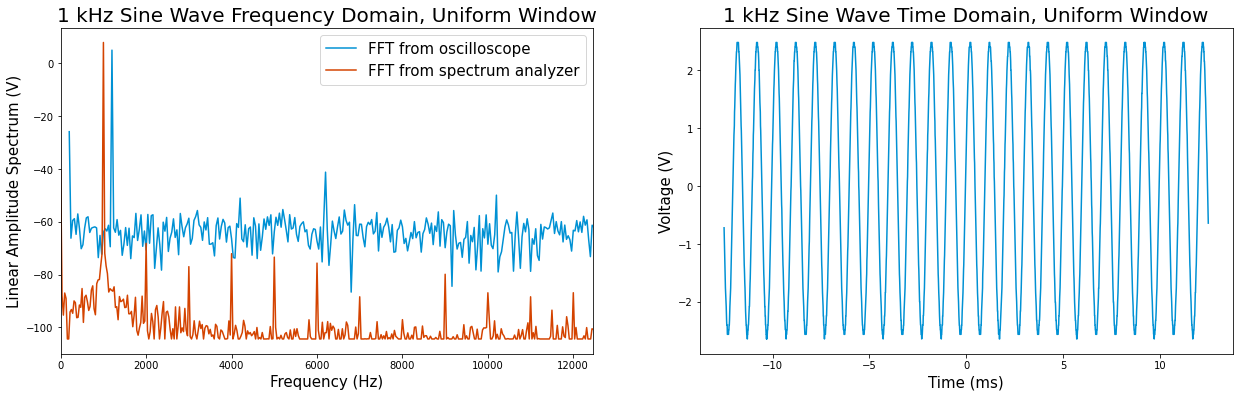

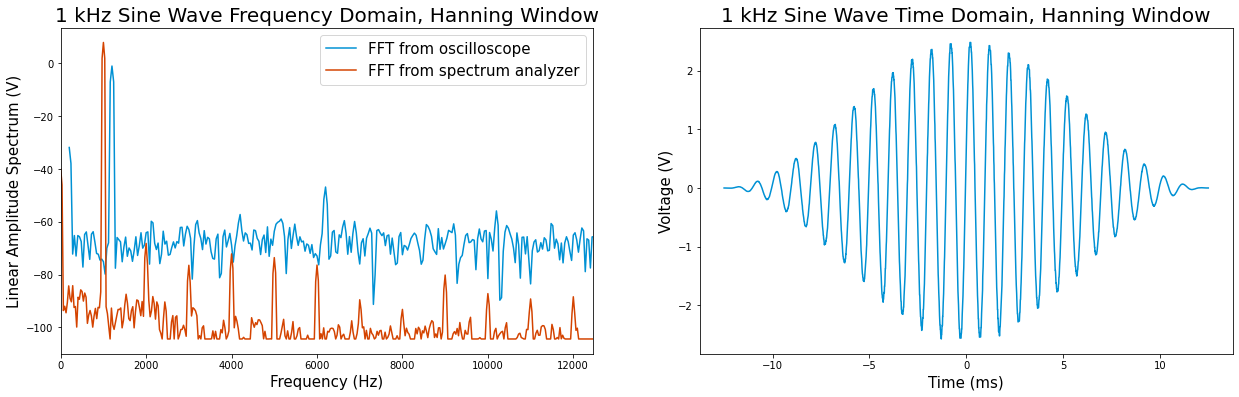

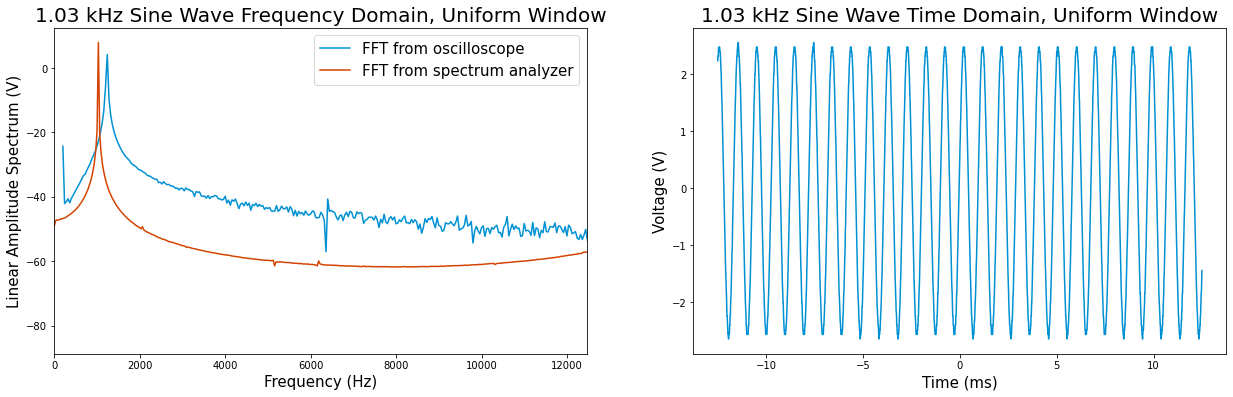

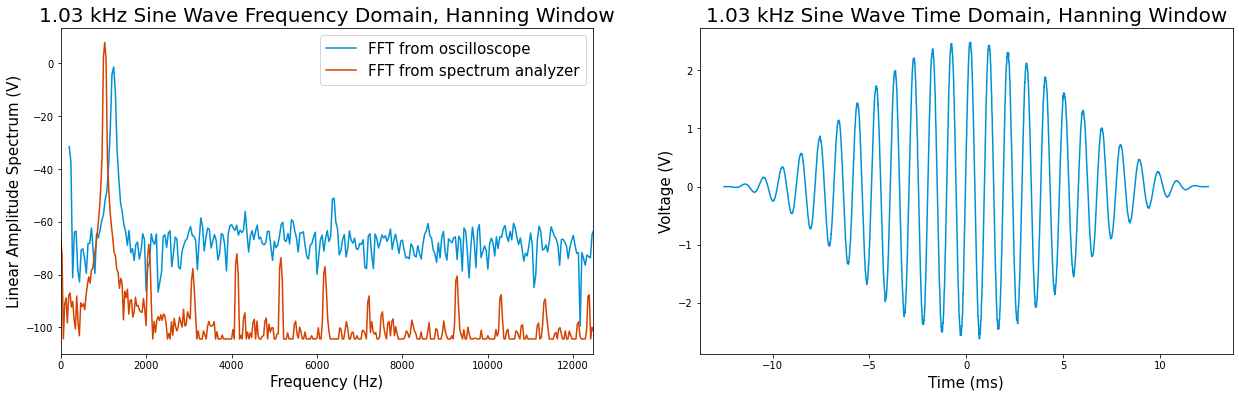

In [6]:
# plotting sin waves for part 1a

data = ("data/part_1/part_a_oscilloscope/", "sin_1_1khz.CSV", "data/part_1/part_a_spectrum_analyzer/", "uniform_sin_1_1khz.csv")
title = '1 kHz Sine Wave'
savename = title.replace(".", "_")
fft_plot(*data, do_dBV = True, wave=title, savename=savename)

data = ("data/part_1/part_a_oscilloscope/", "sin_1_1khz.CSV", "data/part_1/part_a_spectrum_analyzer/", "hanning_sin_1_1khz.csv")
title = '1 kHz Sine Wave'
savename = title.replace(".", "_")
fft_plot(*data, window='hanning', do_dBV=True, wave=title, savename=savename)

data = ("data/part_1/part_a_oscilloscope/", "sin_1_1.03khz.CSV", "data/part_1/part_a_spectrum_analyzer/", "uniform_sin_1_1.03khz.csv")
title = '1.03 kHz Sine Wave'
savename = title.replace(".", "_")
fft_plot(*data, do_dBV = True, wave=title, savename=savename)

data = ("data/part_1/part_a_oscilloscope/", "sin_1_1.03khz.CSV", "data/part_1/part_a_spectrum_analyzer/", "hanning_sin_1_1.03khz.csv")
title = '1.03 kHz Sine Wave'
savename = title.replace(".", "_")
fft_plot(*data, window='hanning', do_dBV=True, wave=title, savename=savename)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


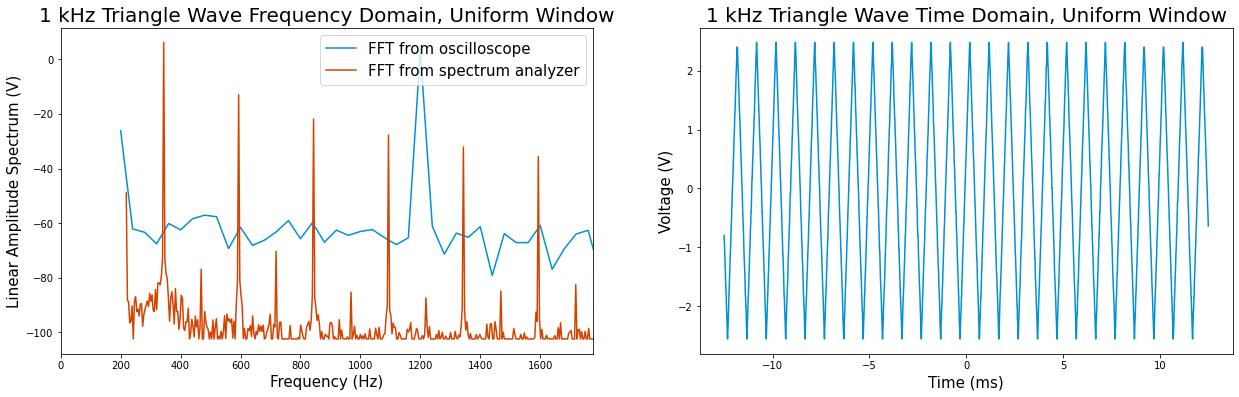

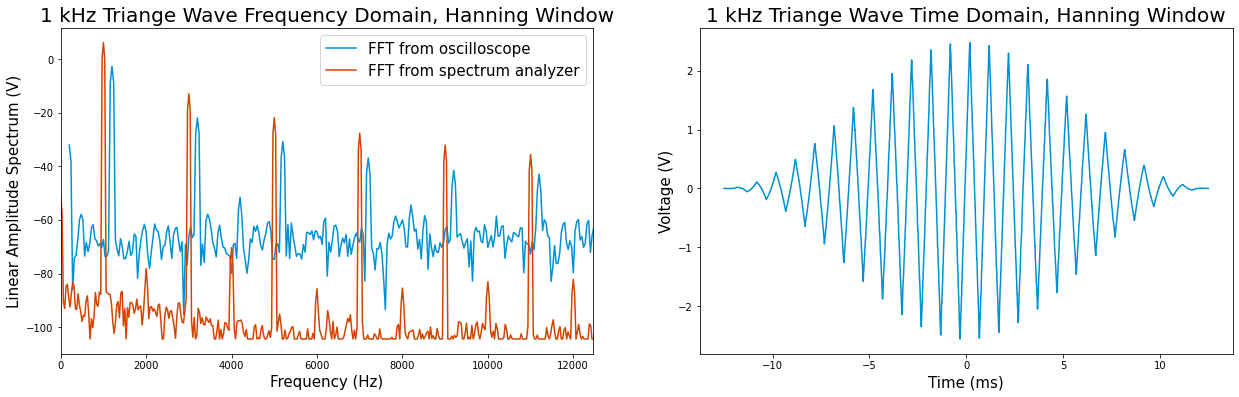

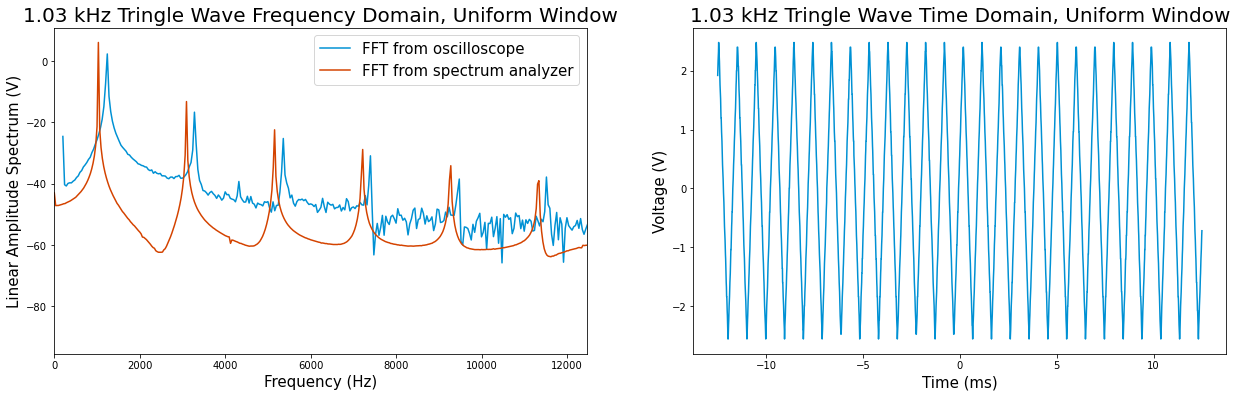

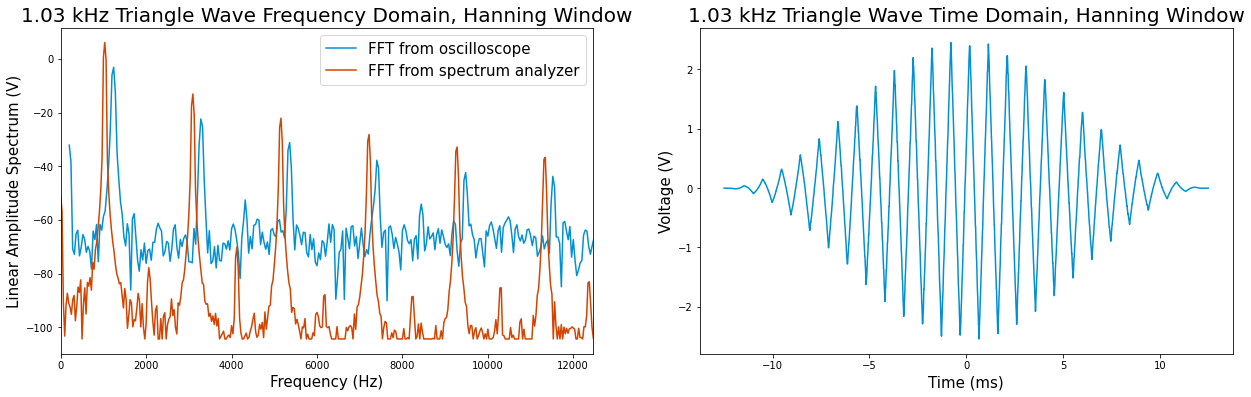

In [7]:
# plotting triangle waves for part 1a

data = ("data/part_1/part_a_oscilloscope/", "tri_1_1khz.CSV", "data/part_1/part_a_spectrum_analyzer/", "uniform_tri_1_1khz.csv")
title = '1 kHz Triangle Wave'
savename = title.replace(".", "_")
fft_plot(*data, do_dBV = True, wave=title, savename=savename)

data = ("data/part_1/part_a_oscilloscope/", "tri_1_1khz.CSV", "data/part_1/part_a_spectrum_analyzer/", "hanning_tri_1_1khz.csv")
title = '1 kHz Triange Wave'
savename = title.replace(".", "_")
fft_plot(*data, window='hanning', do_dBV=True, wave=title, savename=savename)

data = ("data/part_1/part_a_oscilloscope/", "tri_1_1.03khz.CSV", "data/part_1/part_a_spectrum_analyzer/", "uniform_tri_1_1.03khz.csv")
title = '1.03 kHz Tringle Wave'
savename = title.replace(".", "_")
fft_plot(*data, do_dBV = True, wave=title, savename=savename)

data = ("data/part_1/part_a_oscilloscope/", "tri_1_1.03khz.CSV", "data/part_1/part_a_spectrum_analyzer/", "hanning_tri_1_1.03khz.csv")
title = '1.03 kHz Triangle Wave'
savename = title.replace(".", "_")
fft_plot(*data, window='hanning', do_dBV=True, wave=title, savename=savename)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


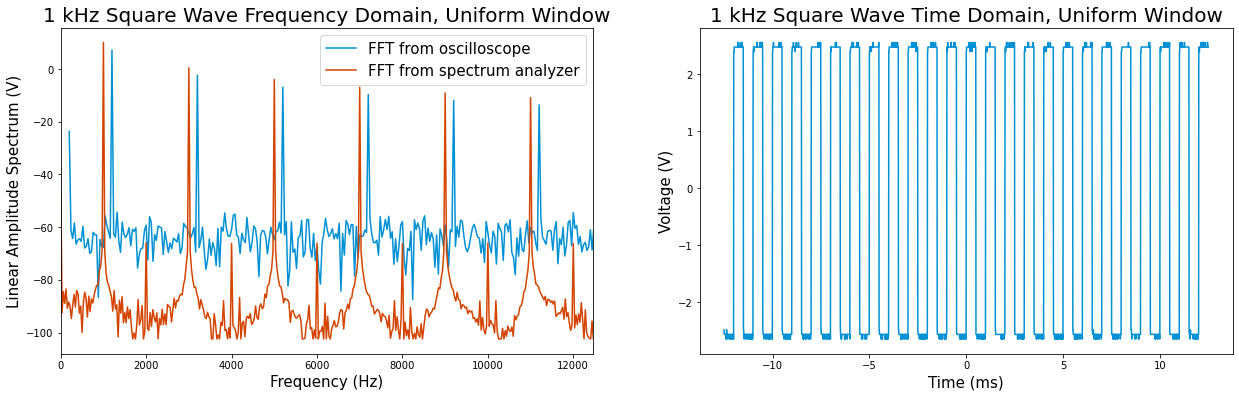

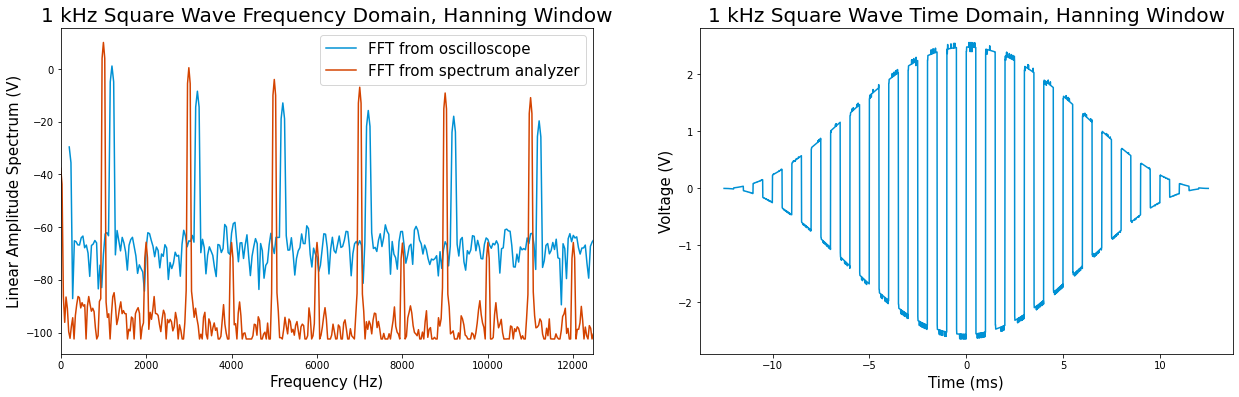

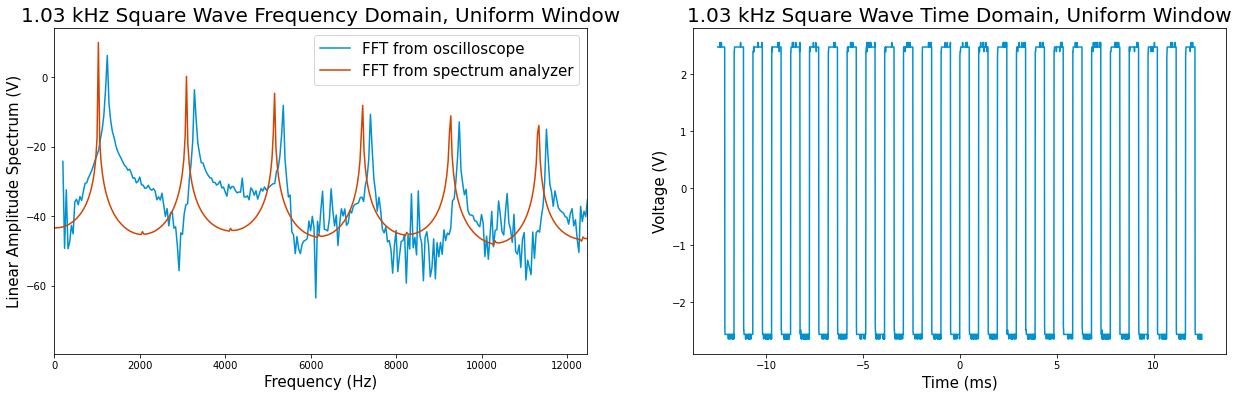

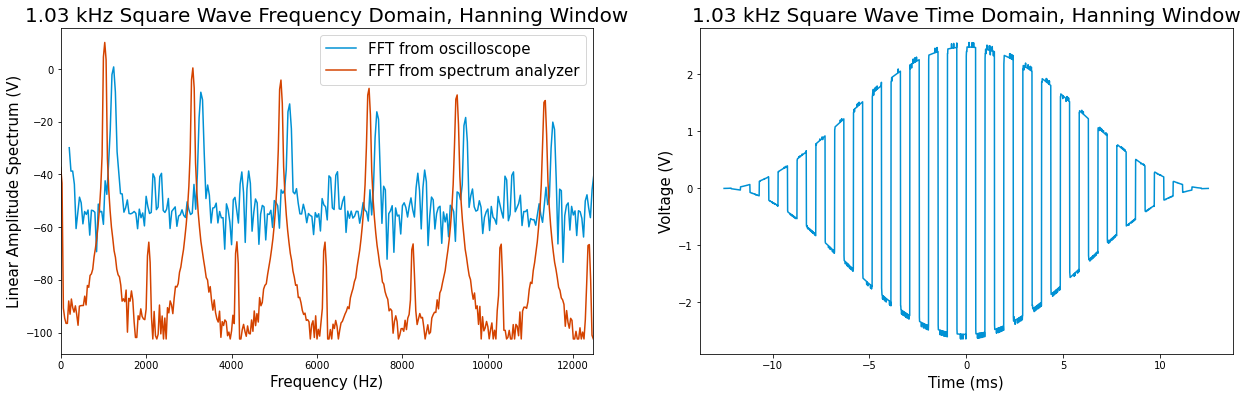

In [8]:
# plotting square waves for part 1a

data = ("data/part_1/part_a_oscilloscope/", "squr_1_1khz.CSV", "data/part_1/part_a_spectrum_analyzer/", "uniform_squr_1_1khz.csv")
title = '1 kHz Square Wave'
savename = title.replace(".", "_")
fft_plot(*data, do_dBV = True, wave=title, savename=savename)

data = ("data/part_1/part_a_oscilloscope/", "squr_1_1khz.CSV", "data/part_1/part_a_spectrum_analyzer/", "hanning_squr_1_1khz.csv")
title = '1 kHz Square Wave'
savename = title.replace(".", "_")
fft_plot(*data, window='hanning', do_dBV=True, wave=title, savename=savename)

data = ("data/part_1/part_a_oscilloscope/", "squr_1_1.03khz.CSV", "data/part_1/part_a_spectrum_analyzer/", "uniform_squr_1_1.03khz.csv")
title = '1.03 kHz Square Wave'
savename = title.replace(".", "_")
fft_plot(*data, do_dBV = True, wave=title, savename=savename)

data = ("data/part_1/part_a_oscilloscope/", "squr_1_1.03khz.CSV", "data/part_1/part_a_spectrum_analyzer/", "hanning_squr_1_1.03khz.csv")
title = '1.03 kHz Square Wave'
savename = title.replace(".", "_")
fft_plot(*data, window='hanning', do_dBV=True, wave=title, savename=savename)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


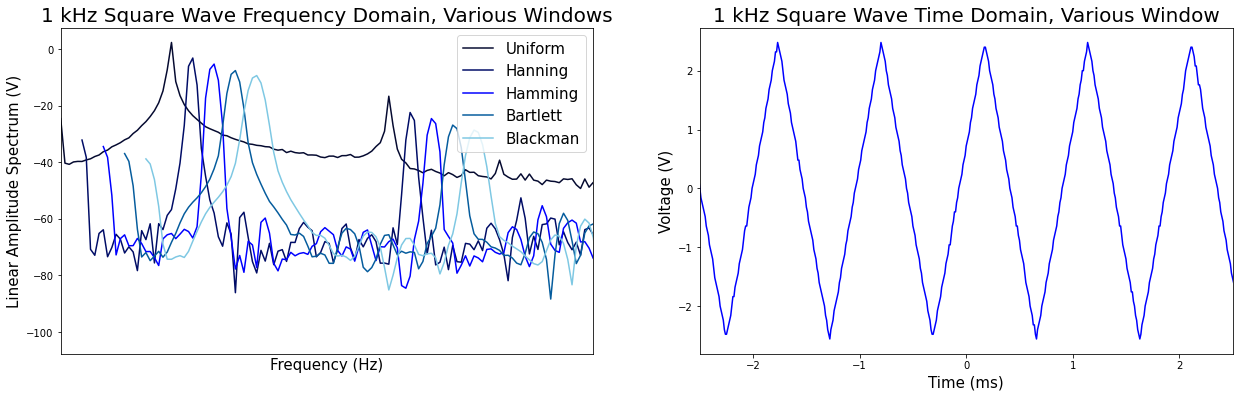

In [10]:
def fft_windows(data1, window):
    times = data1[3]
    voltages = data1[4]

    if window == "uniform":
        pass
    elif window == "hanning":
        voltages *= np.hanning(data1[3].size)
    elif window == "kaiser":
        voltages *= np.kaiser(data1[3].size, beta)
    elif window == "hamming":
        voltages *= np.hamming(data1[3].size)
    elif window == "bartlett":
        voltages *= np.bartlett(data1[3].size)
    elif window == "blackman":
        voltages *= np.blackman(data1[3].size)


    N = len(times)
    dt = float(np.array(data1[data[0] == 'Sample Interval'][1])[0])

    Ys = np.fft.rfft(voltages)
    fs = np.fft.rfftfreq(N, dt)

    vert = np.sqrt(2)*np.abs(Ys) / N

    vert = 20*np.log10(vert)
    return fs, vert

file = "tri_1_1.03khz.CSV"

# Plotting
data = pd.read_csv("data/part_1/part_a_oscilloscope/" + file, header=None)
wave  = '1 kHz Square Wave'


color1a, color2a, color3a, color4a, color5a = "#050a30", "#000c66", "#0000ff", '#055c9d', "#7ec8e3"

plt.figure(figsize=(21, 6))
plt.subplot(121)
xs, ys = fft_windows(data, 'uniform')
plt.plot(xs, ys, c=color1a, label='Uniform',linewidth=1.5)
xs, ys = fft_windows(data, 'hanning')
plt.plot(xs+200, ys, c=color2a, label='Hanning',linewidth=1.5)
xs, ys = fft_windows(data, 'hamming')
plt.plot(xs+400, ys, c=color3a, label='Hamming',linewidth=1.5)
xs, ys = fft_windows(data, 'bartlett')
plt.plot(xs+600, ys, c=color4a, label='Bartlett',linewidth=1.5)
xs, ys = fft_windows(data, 'blackman')
plt.plot(xs+800, ys, c=color5a, label='Blackman',linewidth=1.5)


plt.title(wave + " Frequency Domain, Various Windows", fontsize=20)

plt.xlabel('Frequency (Hz)', fontsize=15)
plt.ylabel('Linear Amplitude Spectrum (V)', fontsize=15)

plt.xlim(0,5000) 
plt.xticks([])  
plt.legend(prop={'size':15}, loc="upper right")

plt.subplot(122)
data = pd.read_csv("data/part_1/part_a_oscilloscope/" + file, header=None)

times = data[3]
voltages = data[4]

plt.plot(times*1000, voltages, c=color3a)   # time mult by 1000 to be in ms

plt.title(f"{wave} Time Domain, Various Window", fontsize=20)

plt.ylabel('Voltage (V)', fontsize=15)
plt.xlabel('Time (ms)', fontsize=15)
plt.xlim(-2.5,2.5)

plt.savefig(f"{image_path}{'Variety of Windows'}.eps", format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


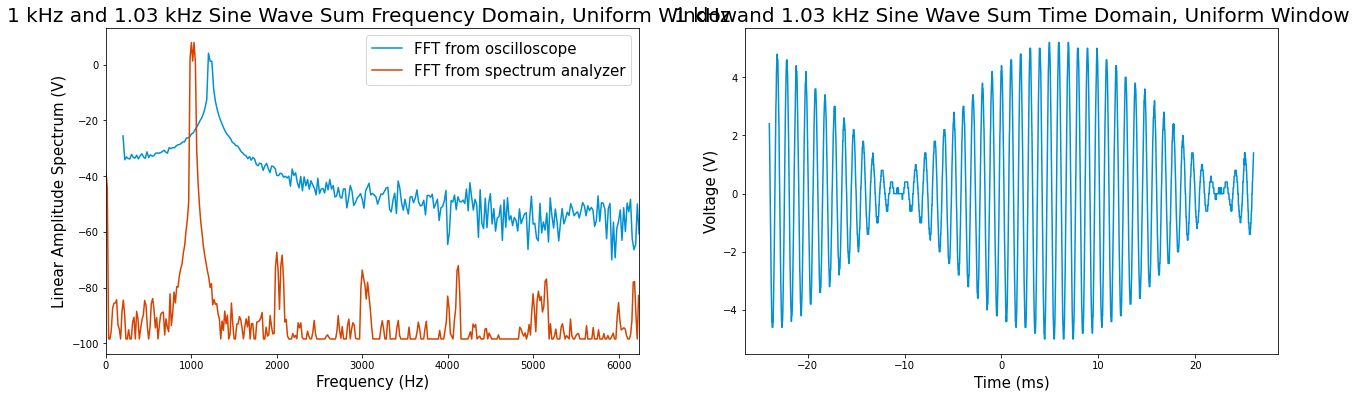

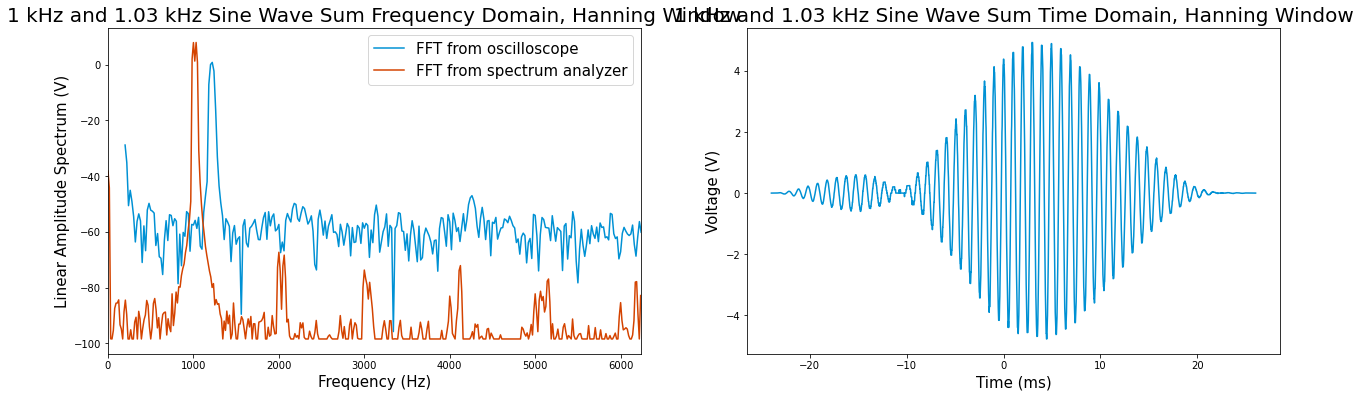

In [11]:
# plotting 1 b
data = ("data/part_1/part_b_oscilloscope/", "F0001CH1.CSV", "data/part_1/part_b_spectrum_analyzer/", "hanning_summer_1and1.03.csv")
title = '1 kHz and 1.03 kHz Sine Wave Sum'
savename = title.replace(".", "_")
fft_plot(*data, window='uniform', do_dBV=True, wave=title, savename=savename)

data = ("data/part_1/part_b_oscilloscope/", "F0001CH1.CSV", "data/part_1/part_b_spectrum_analyzer/", "hanning_summer_1and1.03.csv")
title = '1 kHz and 1.03 kHz Sine Wave Sum'
savename = title.replace(".", "_")
fft_plot(*data, window='hanning', do_dBV=True, wave=title, savename=savename)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


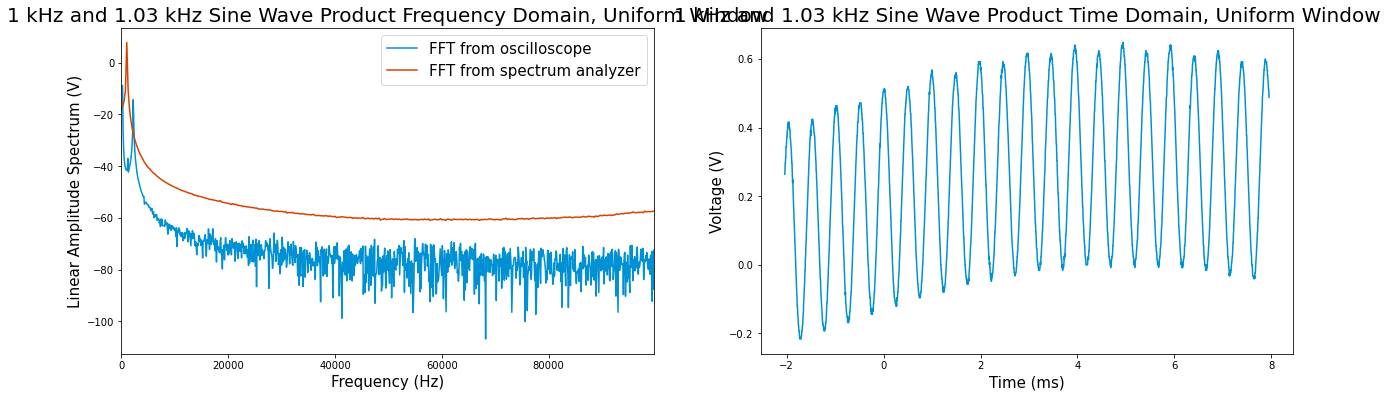

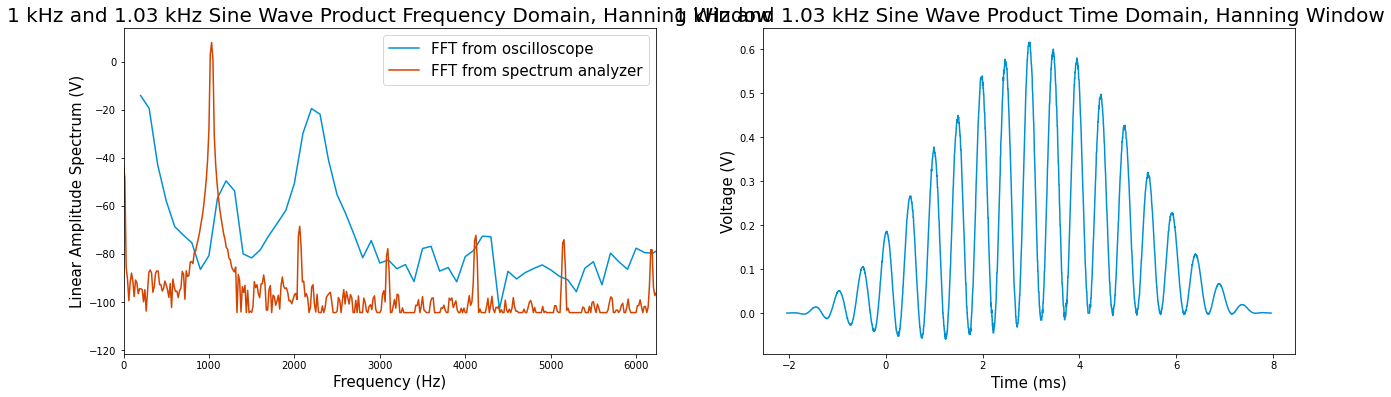

In [12]:
data = ("data/part_1/part_c_oscilloscope/", "F0000CH1_1.CSV", "data/part_1/part_c_spectrum_analyzer/", "uniform_sin_1_1.03khz.csv")
title = '1 kHz and 1.03 kHz Sine Wave Product'
savename = title.replace(".", "_")
fft_plot(*data, window='uniform', do_dBV=True, wave=title, savename=savename)

# scratch this one
data = ("data/part_1/part_c_oscilloscope/", "F0000CH1_1.CSV", "data/part_1/part_c_spectrum_analyzer/", "hanning_sin_1_1.03khz.csv")
title = '1 kHz and 1.03 kHz Sine Wave Product'
savename = title.replace(".", "_")
fft_plot(*data, window='hanning', do_dBV=True, wave=title, savename=savename)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


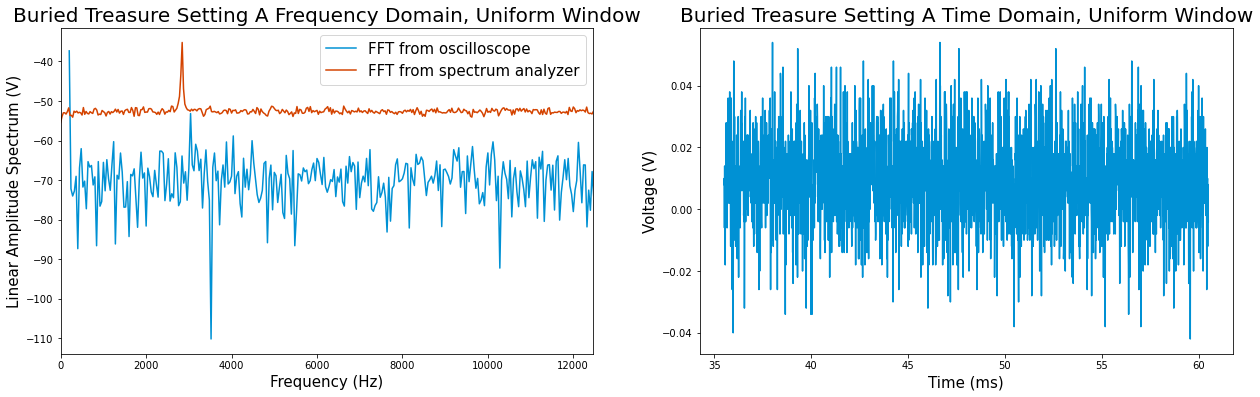

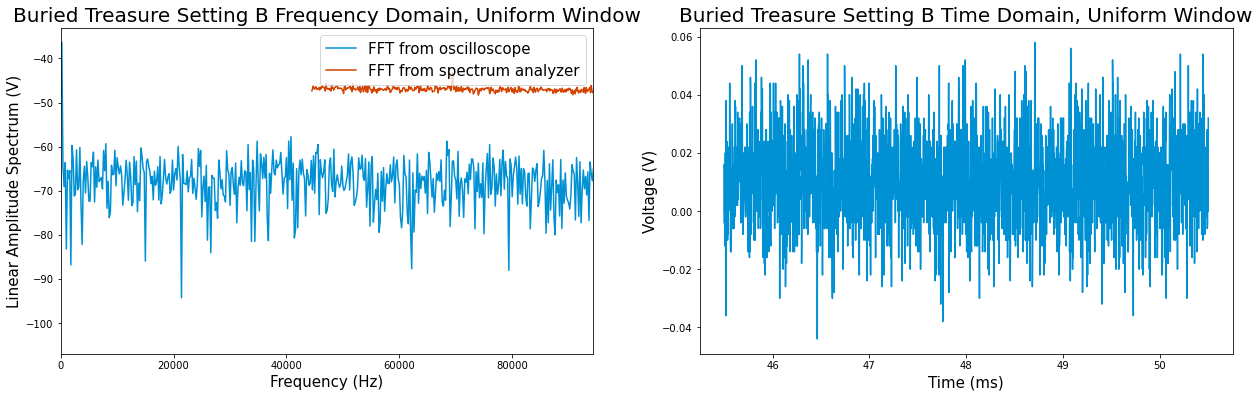

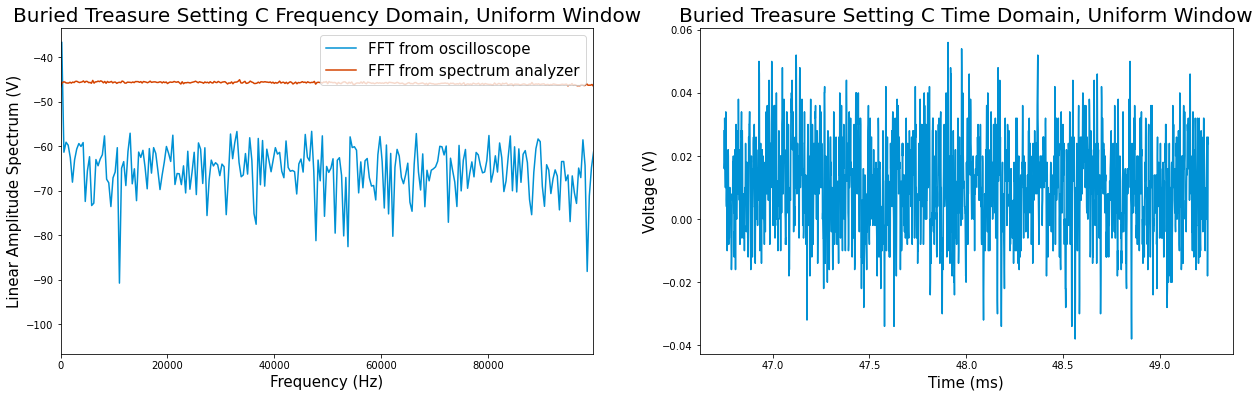

In [13]:
data = ("data/part_1/part_d_oscilloscope/", "setting_A.csv", "data/part_1/part_d_specturm_analyzer/", "setting_A.csv")
title = 'Buried Treasure Setting A'
savename = title.replace(".", "_")
fft_plot(*data, window='uniform', do_dBV=True, wave=title, savename=savename)

data = ("data/part_1/part_d_oscilloscope/", "setting_B.csv", "data/part_1/part_d_specturm_analyzer/", "setting_B.csv")
title = 'Buried Treasure Setting B'
savename = title.replace(".", "_")
fft_plot(*data, window='uniform', do_dBV=True, wave=title, savename=savename)

data = ("data/part_1/part_d_oscilloscope/", "setting_C.csv", "data/part_1/part_d_specturm_analyzer/", "setting_C.csv")
title = 'Buried Treasure Setting C'
savename = title.replace(".", "_")
fft_plot(*data, window='uniform', do_dBV=True, wave=title, savename=savename)

# Part 2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


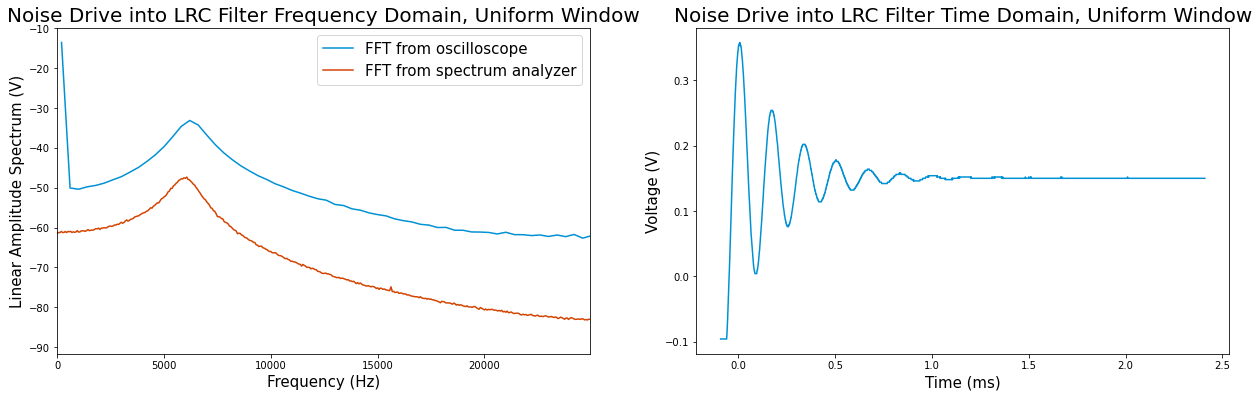

In [14]:
data = ("data/part_2/part_d/", "F0001CH1.CSV", "data/part_2/part_b/", "noise_drive_spectrum.csv")
title = 'Noise Drive into LRC Filter'
savename = title.replace(".", "_")
fft_plot(*data, window='uniform', do_dBV=True, wave=title, savename=savename)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


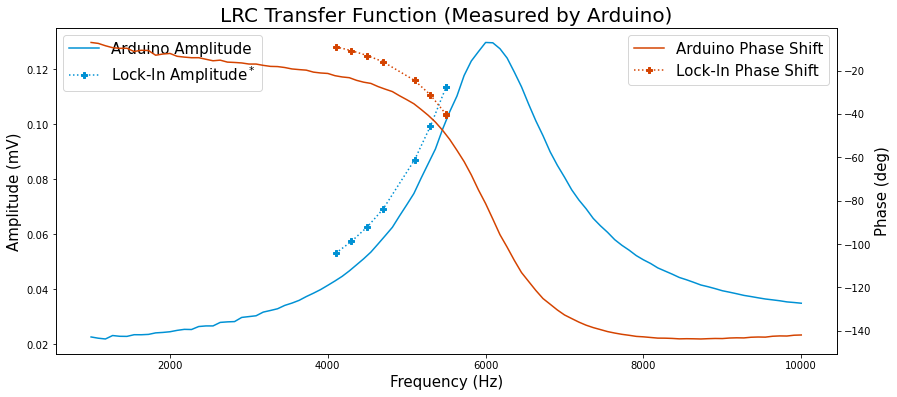

In [15]:
direc = "data/part_2/part_c/"
run01 = pd.read_csv(direc + "run_01", delimiter = " ")
run02 = pd.read_csv(direc + "run_02", delimiter = " ")
run03 = pd.read_csv(direc + "run_03", delimiter = " ")

data = pd.read_csv('data/part_2/part_a/' + "sin_lockin.csv")
amp = np.sqrt(data['X']**2 + data['Y']**2)
freq = data['freq']*1000
angle = -np.arctan(data['Y']/data['X'])*180/np.pi


i = 0
# for run in [run01, run02, run03]:
for run in [run02]:
    fig, ax1 = plt.subplots(figsize=(14,6))
    ax1.plot(run["f"], run["R"], c=color1, label="Arduino Amplitude")
    ax1.plot(freq, amp/3500, linestyle=":", marker="P", c=color1, label=r"Lock-In Amplitude$^*$")

    ax1.set_title("LRC Transfer Function (Measured by Arduino)", fontsize=20)
    ax1.set_xlabel("Frequency (Hz)", fontsize=15)
    ax1.set_ylabel("Amplitude (mV)", fontsize=15)
    ax1.legend(loc="upper left", prop={'size':15})
    
    ax2 = ax1.twinx()
    ax2.plot(run["f"], run["theta"], c=color2, label="Arduino Phase Shift")
    ax2.plot(freq, angle,linestyle=":", marker="P", c=color2, label="Lock-In Phase Shift")
    ax2.set_ylabel("Phase (deg)", fontsize=15)
    ax2.legend(loc="upper right", prop={'size':15})
    
    plt.savefig(image_path + "arduino data_.eps", format='eps')
    plt.show()
    i+= 1
    


# Part 3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


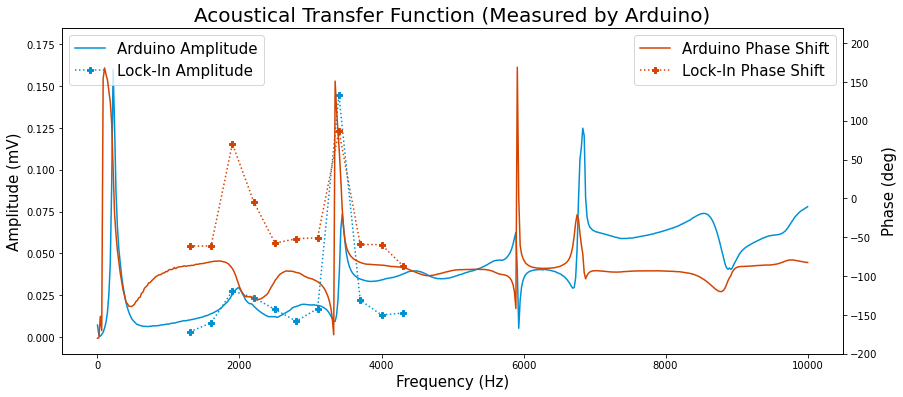

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


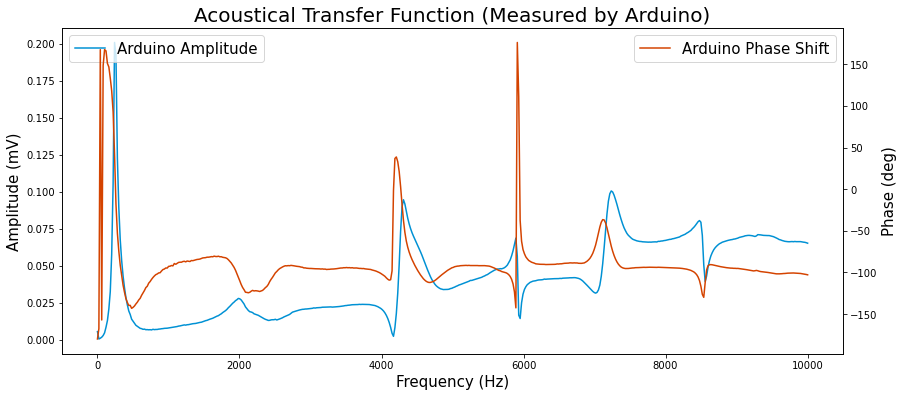

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


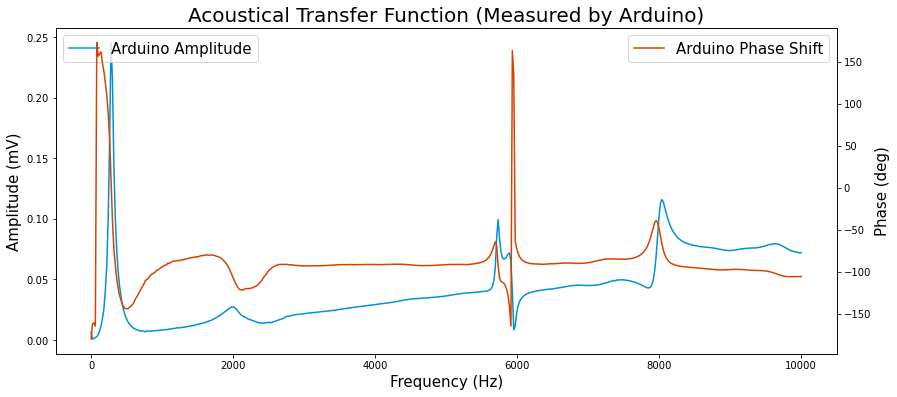

In [16]:
direc = "data/part_3/part_c/"
run01 = pd.read_csv(direc + "6cm cavity", delimiter = " ")
run02 = pd.read_csv(direc + "5cm cavity", delimiter = " ")
run03 = pd.read_csv(direc + "4cm cavity", delimiter = " ")

data = pd.read_csv("data/part_3/part_a/" + "sin_lockin_and_osc.csv")
amp = np.sqrt(data['X']**2 + data['Y']**2)/1000
freq = data['freq']*1000
angle = -np.arctan(data['Y']/data['X'])*180/np.pi

i = 0
for run in [run01, run02, run03]:
    fig, ax1 = plt.subplots(figsize=(14,6))
    ax1.plot(run["f"], run["R"], c=color1, label="Arduino Amplitude")

    ax1.set_title("Acoustical Transfer Function (Measured by Arduino)", fontsize=20)
    ax1.set_xlabel("Frequency (Hz)", fontsize=15)
    ax1.set_ylabel("Amplitude (mV)", fontsize=15)

    ax2 = ax1.twinx()
    ax2.plot(run["f"], run["theta"], c=color2, label="Arduino Phase Shift")
    ax2.set_ylabel("Phase (deg)", fontsize=15)

    if i == 0:
        ax1.plot(freq, amp, marker="P", linestyle=":", c=color1, label="Lock-In Amplitude")
        ax2.plot(freq, angle, marker="P", linestyle=":", c=color2, label="Lock-In Phase Shift")
        ax1.set_ylim(-0.01, 0.185)
        ax2.set_ylim(-200, 220)
    ax1.legend(loc="upper left", prop={'size': 15})
    ax2.legend(loc="upper right", prop={'size':15})
    
    

    plt.savefig(image_path + "arduino data_" + str(i)+".eps", format='eps')
    plt.show()
    i+= 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


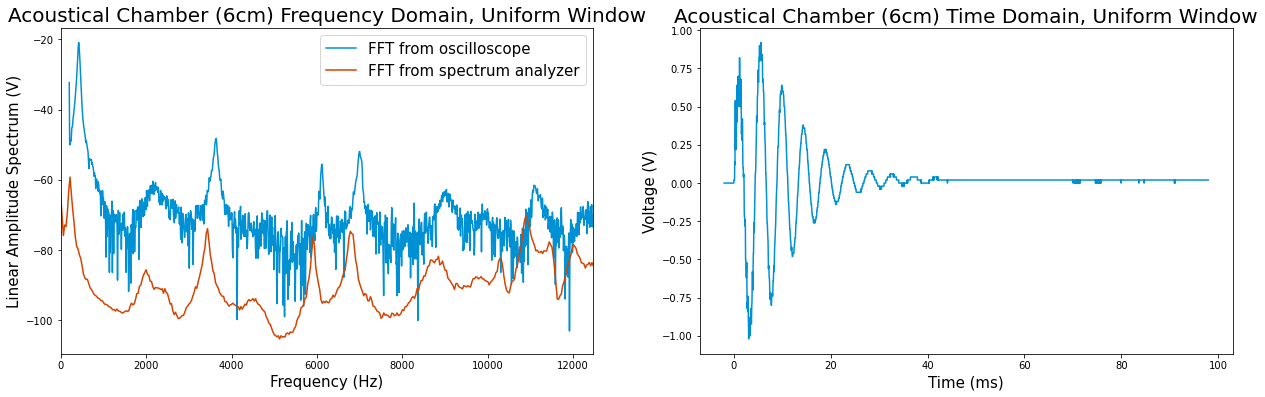

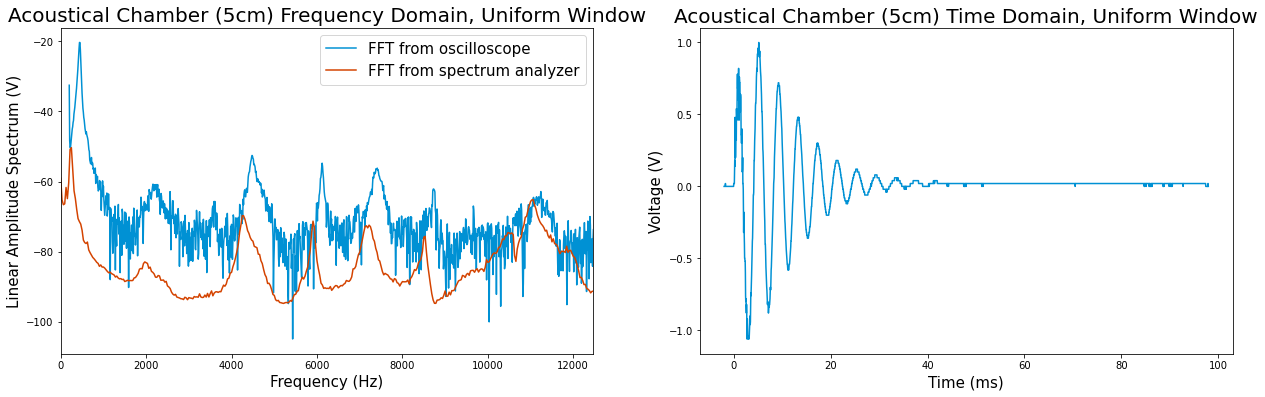

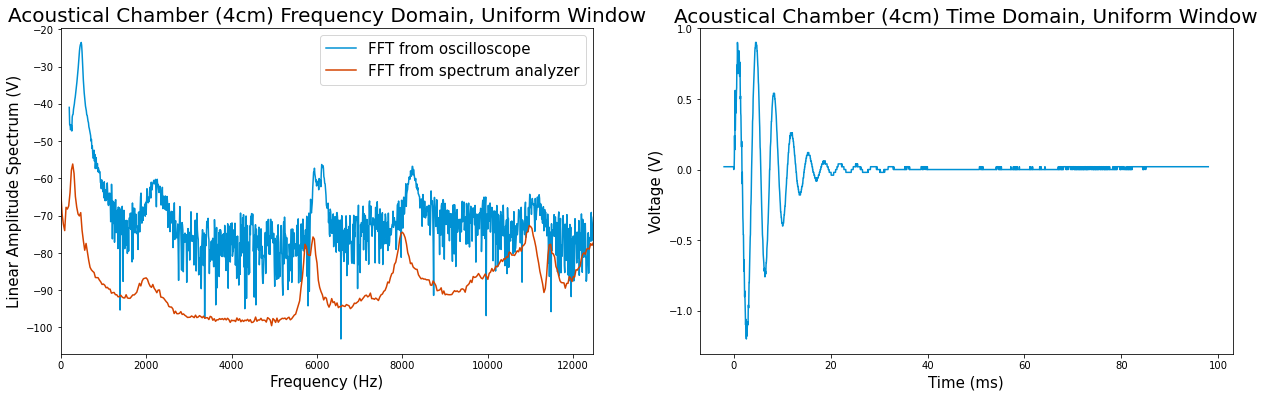

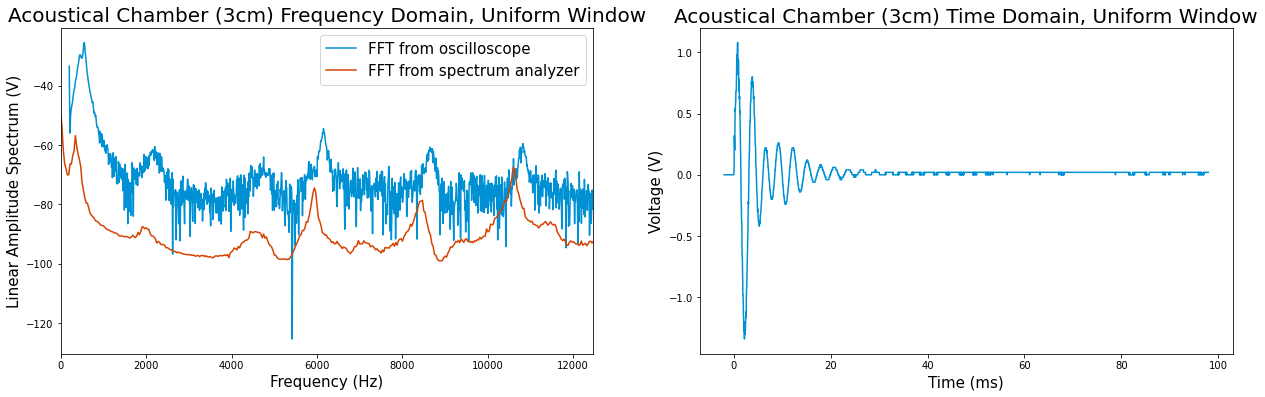

In [17]:
data = ("data/part_3/part_d/", "6cm_resonance.CSV", "data/part_3/part_b/", "3B")
title = 'Acoustical Chamber (6cm)'
savename = title.replace(".", "_")
fft_plot(*data, window='uniform', do_dBV=True, wave=title, savename=savename)

data = ("data/part_3/part_d/", "5cm_resonance.CSV", "data/part_3/part_b/", "3B1")
title = 'Acoustical Chamber (5cm)'
savename = title.replace(".", "_")
fft_plot(*data, window='uniform', do_dBV=True, wave=title, savename=savename)

data = ("data/part_3/part_d/", "4cm_resonance.CSV", "data/part_3/part_b/", "3B2")
title = 'Acoustical Chamber (4cm)'
savename = title.replace(".", "_")
fft_plot(*data, window='uniform', do_dBV=True, wave=title, savename=savename)

data = ("data/part_3/part_d/", "3cm_resonance.CSV", "data/part_3/part_b/", "3B3")
title = 'Acoustical Chamber (3cm)'
savename = title.replace(".", "_")
fft_plot(*data, window='uniform', do_dBV=True, wave=title, savename=savename)